<a href="https://colab.research.google.com/github/dinhtiendat2k3/bai-tap/blob/main/Bu%E1%BB%95i_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Đường link đến file dữ liệu
url = "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/dpc-covid19-ita-regioni.csv"

# Sử dụng pandas để đọc dữ liệu từ đường link
df = pd.read_csv(url)

# Hiển thị một số dòng đầu tiên của dữ liệu để kiểm tra
print(df.head())

                  data stato  codice_regione denominazione_regione        lat  \
0  2020-02-24T18:00:00   ITA              13               Abruzzo  42.351222   
1  2020-02-24T18:00:00   ITA              17            Basilicata  40.639471   
2  2020-02-24T18:00:00   ITA              18              Calabria  38.905976   
3  2020-02-24T18:00:00   ITA              15              Campania  40.839566   
4  2020-02-24T18:00:00   ITA               8        Emilia-Romagna  44.494367   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  16.594402                       0                  0                     0   
3  14.250850                       0                  0                     0   
4  11.341721                      10                  2                    12   

   isolamento_domiciliare 

In [ ]:
# Xóa các cột không cần thiết
columns_to_drop = ['note', 'note_test', 'note_casi']
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
# Các cột cần thay thế giá trị bị thiếu bằng giá trị trung bình
columns_to_fill = ['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati',
                   'isolamento_domiciliare', 'totale_positivi', 'nuovi_positivi',
                   'dimessi_guariti', 'deceduti', 'totale_casi', 'casi_testati']

# Thay thế các giá trị bị thiếu bằng giá trị trung bình của cột đó
for column in columns_to_fill:
    mean_value = df[column].mean()  # Tính giá trị trung bình của cột
    df[column].fillna(mean_value, inplace=True)  # Thay thế giá trị bị thiếu bằng giá trị trung bình

# Hiển thị thông tin của DataFrame sau khi thay thế
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20286 entries, 0 to 20285
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    20286 non-null  object 
 1   stato                                   20286 non-null  object 
 2   codice_regione                          20286 non-null  int64  
 3   denominazione_regione                   20286 non-null  object 
 4   lat                                     20286 non-null  float64
 5   long                                    20286 non-null  float64
 6   ricoverati_con_sintomi                  20286 non-null  int64  
 7   terapia_intensiva                       20286 non-null  int64  
 8   totale_ospedalizzati                    20286 non-null  int64  
 9   isolamento_domiciliare                  20286 non-null  int64  
 10  totale_positivi                         20286 non-null  in

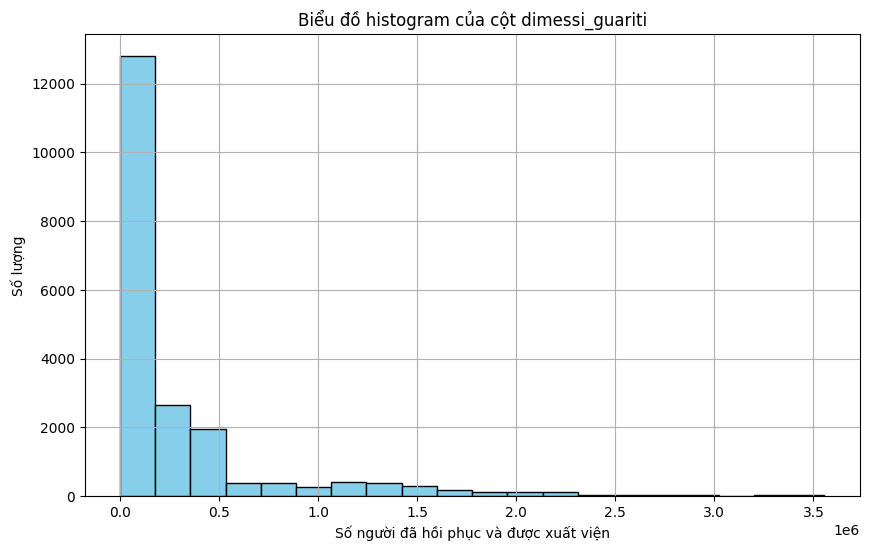

In [ ]:
import matplotlib.pyplot as plt
# Chọn cột 'dimessi_guariti' (Số người đã hồi phục và được xuất viện) để vẽ biểu đồ histogram
selected_column = 'dimessi_guariti'

# Lấy dữ liệu từ cột đã chọn
selected_data = df[selected_column]

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
plt.hist(selected_data, bins=20, color='skyblue', edgecolor='black')  # Số lượng bins là 20
plt.title('Biểu đồ histogram của cột ' + selected_column)
plt.xlabel('Số người đã hồi phục và được xuất viện')
plt.ylabel('Số lượng')
plt.grid(True)
plt.show()


In [ ]:
# Biểu đồ histogram của cột dimessi_guariti thể hiện số người đã hồi phục và xuất viện.
# ta có thể thấy số người hồi phục và xuất viện có xu hướng giảm mạnh từ hơn 12000 xuống hơn 2000 và tiếp tục giảm .
# Điều này cho thấy số ca nhiễm covid được tiếp nhận đã được giảm đi rất nhiều nên số ca hồi phục cũng có xu hướng giảm theo. Điều đó cho thấy được covid 19 về sau đã được kiểm soát và ngăn chặn triệt để